# Analysist Project: Bike Sharing Dataset

- **Nama:** Shofi Yulloh Kamil
- **Email:** shofiyullohkamil01@gmail.com
- **ID Dicoding:** MS058D5Y0629

## Fine tune the business question

**Questions:**
- **Question 1:** When is the busiest time for bike rentals?
- **Question 2:** Is there a correlation in total bike rentals?
- **Question 3:** How have bike rental sales performed over the past few years?
- **Question 4:** What is the number of rentals in each season?


## Prepare The Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling


### Gathering The Data

In [3]:
df_hour = pd.read_csv('Data/hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df_day = pd.read_csv('Data/day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Gathers between bike rent data per day and hours

## Asessing Data

In [ ]:
# See the data types of the columns
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
# See the data types of the columns
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
# See describe of the data
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# See describe of the data
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
# Check for missing values
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
# Check for missing values
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
# Check for duplicated values
print(f"Jumlah data hari yang terduplikat: ", df_day.duplicated().sum())

Jumlah data hari yang terduplikat:  0


In [ ]:
# Check for duplicated values
print(f"Jumlah data jam yang terduplikat: ", df_hour.duplicated().sum())

Jumlah data jam yang terduplikat:  0


### Convert data type 

In [13]:
# convert int to category
column = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for cols in column:
    df_day[cols] = df_day[cols].astype('category')
    df_hour[cols] = df_hour[cols].astype('category')

In [14]:
# convert dteday type to datetime
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

### Drop the columns

In [15]:
# drop column 'workingday'
df_hour.drop(['workingday'], axis=1, inplace=True)
df_day.drop(['workingday'], axis=1, inplace=True)

It is the same things like 'weekdays' columns

### Rename the columns

In [16]:
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [17]:
# rename column
df_hour.rename(columns={'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'weathersit': 'weather', 'temp': 'temperature', 'atemp': 'feeling_temperature', 'hum': 'humidity', 'windspeed': 'wind_speed', 'cnt': 'total_rent'}, inplace=True)
df_day.rename(columns={'yr': 'year', 'mnth': 'month', 'weathersit': 'weather', 'temp': 'temperature', 'atemp': 'feeling_temperature', 'hum': 'humidity', 'windspeed': 'wind_speed', 'cnt': 'total_rent'}, inplace=True)

### Convert column value

Convert the values can make easier to understand value of data. It'll convert from numeric data type to categoric data.

There's the columns:
- month
- season
- weather
- weekday
- year
- humidity


In [18]:
# change value in column 'month'
df_day.month.replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}, inplace=True)
df_hour.month.replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}, inplace=True)

/var/folders/0x/6g78zn811lx20sbw8vydh3lw0000gn/T/ipykernel_22214/1344805108.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_day.month.replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}, inplace=True)
/var/folders/0x/6g78zn811lx20sbw8vydh3lw0000gn/T/ipykernel_22214/1344805108.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future versi

In [19]:
# change value in column 'season'
df_day.season.replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace=True)
df_hour.season.replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace=True)

/var/folders/0x/6g78zn811lx20sbw8vydh3lw0000gn/T/ipykernel_22214/912046478.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_day.season.replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace=True)
/var/folders/0x/6g78zn811lx20sbw8vydh3lw0000gn/T/ipykernel_22214/912046478.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rena

In [20]:
# change value in column 'weather'
df_day.weather.replace({1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'}, inplace=True)
df_hour.weather.replace({1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'}, inplace=True)

/var/folders/0x/6g78zn811lx20sbw8vydh3lw0000gn/T/ipykernel_22214/266420264.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_day.weather.replace({1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'}, inplace=True)
/var/folders/0x/6g78zn811lx20sbw8vydh3lw0000gn/T/ipykernel_22214/266420264.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.

In [21]:
# change value in column 'weekday'
df_day.weekday.replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}, inplace=True)
df_hour.weekday.replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}, inplace=True)

/var/folders/0x/6g78zn811lx20sbw8vydh3lw0000gn/T/ipykernel_22214/3284918046.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_day.weekday.replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}, inplace=True)
/var/folders/0x/6g78zn811lx20sbw8vydh3lw0000gn/T/ipykernel_22214/3284918046.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the ca

In [22]:
# change value in column 'year'
df_day.year.replace({0: '2011', 1: '2012'}, inplace=True)
df_hour.year.replace({0: '2011', 1: '2012'}, inplace=True)

/var/folders/0x/6g78zn811lx20sbw8vydh3lw0000gn/T/ipykernel_22214/2224146261.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_day.year.replace({0: '2011', 1: '2012'}, inplace=True)
/var/folders/0x/6g78zn811lx20sbw8vydh3lw0000gn/T/ipykernel_22214/2224146261.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_

In [53]:
# change value in column 'holiday'
df_day.holiday.replace({0: 'No', 1: 'Yes'}, inplace=True)
df_hour.holiday.replace({0: 'No', 1: 'Yes'}, inplace=True)

/var/folders/0x/6g78zn811lx20sbw8vydh3lw0000gn/T/ipykernel_22214/995009341.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_day.holiday.replace({0: 'No', 1: 'Yes'}, inplace=True)
/var/folders/0x/6g78zn811lx20sbw8vydh3lw0000gn/T/ipykernel_22214/995009341.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_da

### Make a columns to identify category of day, and classify humidty

In [23]:
# identify day_category
day_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
def order_day_week(day_week):
    if day_week in ['Saturday', 'Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'
    
df_day['day_category'] = df_day['weekday'].apply(order_day_week)
df_hour['day_category'] = df_hour['weekday'].apply(order_day_week)

In [24]:
# *100 of humidity values
df_day['humidity'] = df_day['humidity']*100
df_hour['humidity'] = df_hour['humidity']*100

In [25]:
# classify humidity
def classify_humidity(humidity):
    if humidity <= 30:
        return 'Low'
    elif 30 < humidity <= 60:
        return 'Normal'
    else:
        return 'High'

df_day['humidity_category'] = df_day['humidity'].apply(classify_humidity)
df_hour['humidity_category'] = df_hour['humidity'].apply(classify_humidity)

## Exploratory Data Analysist

### Data per days

In [ ]:
# see describe of the data
df_day.describe(include='all')

,instant,dteday,season,year,month,holiday,weekday,weather,temperature,feeling_temperature,humidity,wind_speed,casual,registered,total_rent,day_category,humidity_category
count,731.000000,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,January,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday,High
freq,NaN,NaN,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,409
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


In [ ]:
# know the relationship between the variables
df_day.groupby(by='day_category').agg({
    'total_rent': ['sum', 'mean']
})

total_rent             
                    sum         mean
day_category                        
Weekday         2370845  4550.566219
Weekend          921834  4389.685714

In [ ]:
# know the relationship between the variables
df_day.groupby(by='humidity_category').agg({
    'total_rent': ['sum', 'mean']
})

total_rent             
                         sum         mean
humidity_category                        
High                 1822151  4455.136919
Low                    19386  3877.200000
Normal               1451142  4577.735016

In [ ]:
# know the relationship between the variables
df_day.groupby(by='season').total_rent.sum().sort_values(ascending=False).reset_index()

/var/folders/0x/6g78zn811lx20sbw8vydh3lw0000gn/T/ipykernel_22214/4040852919.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_day.groupby(by='season').total_rent.sum().sort_values(ascending=False).reset_index()


,season,total_rent
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


In [ ]:
# know the relationship between the variables
df_day.groupby(by='year').agg({
    'total_rent': ['sum'],
    'casual': ['sum'],
    'registered': ['sum']
})

/var/folders/0x/6g78zn811lx20sbw8vydh3lw0000gn/T/ipykernel_22214/4134051248.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_day.groupby(by='year').agg({


,total_rent,casual,registered
,sum,sum,sum
year,,,
2011,1243103,247252,995851
2012,2049576,372765,1676811


### Data per hours

In [ ]:
# see describe of the data
df_hour.describe(include='all')

,instant,dteday,season,year,month,hour,holiday,weekday,weather,temperature,feeling_temperature,humidity,wind_speed,casual,registered,total_rent,day_category,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,May,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday,High
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,9399
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


In [ ]:
# know the relationship between the variables
df_hour.groupby(by='hour').agg({
    'total_rent': ['sum', 'mean']
})

total_rent            
            sum        mean
hour                       
0         39130   53.898072
1         24164   33.375691
2         16352   22.869930
3          8174   11.727403
4          4428    6.352941
5         14261   19.889819
6         55132   76.044138
7        154171  212.064649
8        261001  359.011004
9        159438  219.309491
10       126257  173.668501
11       151320  208.143054
12       184414  253.315934
13       184919  253.661180
14       175652  240.949246
15       183149  251.233196
16       227748  311.983562
17       336860  461.452055
18       309772  425.510989
19       226789  311.523352
20       164550  226.030220
21       125445  172.314560
22        95612  131.335165
23        63941   87.831044

In [ ]:
# know the relationship between the variables
df_hour.groupby(by='hour').total_rent.sum().sort_values(ascending=False)

hour
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: total_rent, dtype: int64

In [ ]:
// know the relationship between the day and the hour
df_hour.groupby(by='day_category').agg({
    'hour': ['sum', 'mean']
})

hour           
                 sum       mean
day_category                   
Weekday       142913  11.557865
Weekend        57758  11.519346

## Visualization & Explanatory Data Analysist

Key target of explanatory data anallytics, the key:

- **Question 1:** When is the busiest time for bike rentals?
- **Question 2:** Is there a correlation in total bike rentals?
- **Question 3:** How have bike rental sales performed over the past few years?
- **Question 4:** What is the number of rentals in each season?


In [35]:
df_hour

,instant,dteday,season,year,month,hour,holiday,weekday,weather,temperature,feeling_temperature,humidity,wind_speed,casual,registered,total_rent,day_category,humidity_category
0,1,2011-01-01,Spring,2011,January,0,0,Saturday,Clear,0.24,0.2879,81.0,0.0000,3,13,16,Weekend,High
1,2,2011-01-01,Spring,2011,January,1,0,Saturday,Clear,0.22,0.2727,80.0,0.0000,8,32,40,Weekend,High
2,3,2011-01-01,Spring,2011,January,2,0,Saturday,Clear,0.22,0.2727,80.0,0.0000,5,27,32,Weekend,High
3,4,2011-01-01,Spring,2011,January,3,0,Saturday,Clear,0.24,0.2879,75.0,0.0000,3,10,13,Weekend,High
4,5,2011-01-01,Spring,2011,January,4,0,Saturday,Clear,0.24,0.2879,75.0,0.0000,0,1,1,Weekend,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Spring,2012,December,19,0,Monday,Mist,0.26,0.2576,60.0,0.1642,11,108,119,Weekday,Normal
17375,17376,2012-12-31,Spring,2012,December,20,0,Monday,Mist,0.26,0.2576,60.0,0.1642,8,81,89,Weekday,Normal
17376,17377,2012-12-31,Spring,2012,December,21,0,Monday,Clear,0.26,0.2576,60.0,0.1642,7,83,90,Weekday,Normal
17377,17378,2012-12-31,Spring,2012,December,22,0,Monday,Clear,0.26,0.2727,56.0,0.1343,13,48,61,Weekday,Normal


### Question 1: When is the busiest time for bike rentals?

/var/folders/0x/6g78zn811lx20sbw8vydh3lw0000gn/T/ipykernel_22214/1575078783.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hour", y="total_rent", data=top_hours, palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3"], ax=ax)


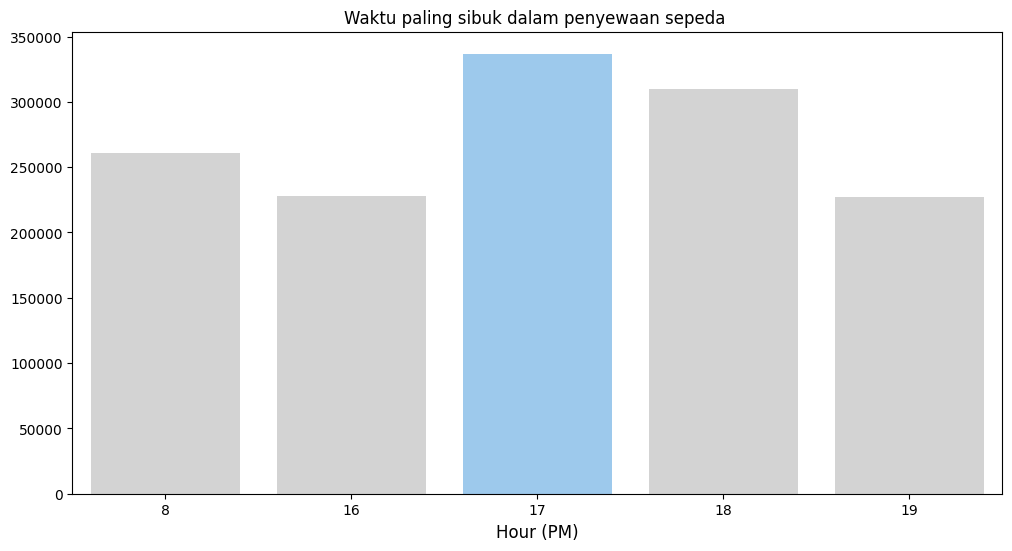

In [ ]:
# barplot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
 
# top hours of bike rental
top_hours = df_hour.groupby(by='hour').total_rent.sum().nlargest(5).reset_index()
sns.barplot(x="hour", y="total_rent", data=top_hours, palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3"], ax=ax)

# set title dan label
ax.set_ylabel(None)
ax.set_xlabel("Hour (PM)", fontsize=12)
ax.set_title("The Bussiest Time in Rent The Bike", loc="center", fontsize=12)
ax.tick_params(axis='y', labelsize=10)
ax.tick_params(axis='x', labelsize=10)

# menampilkan plot
plt.show()

### **Busiest Time for Bike Rentals**

Look at the picture. The busiest time range for bike rentals is from 16:00 until 19:00. This happens because, during this time, city residents are on their way home from work, which is the main reason for the peak rental period.

At 8 o'clock, urban residents rent bikes to engage in activities such as going to work. Until 16:00, they then rent bikes again to head home. Between 17:00 and 18:00 is the average time for leaving the office. This is supported by data that shows high values during that period.



### Question 2: Is there a correlation in total bike rentals?

/var/folders/0x/6g78zn811lx20sbw8vydh3lw0000gn/T/ipykernel_22214/2042829295.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_category', y='total_rent', data=day_category_rent, palette='viridis')


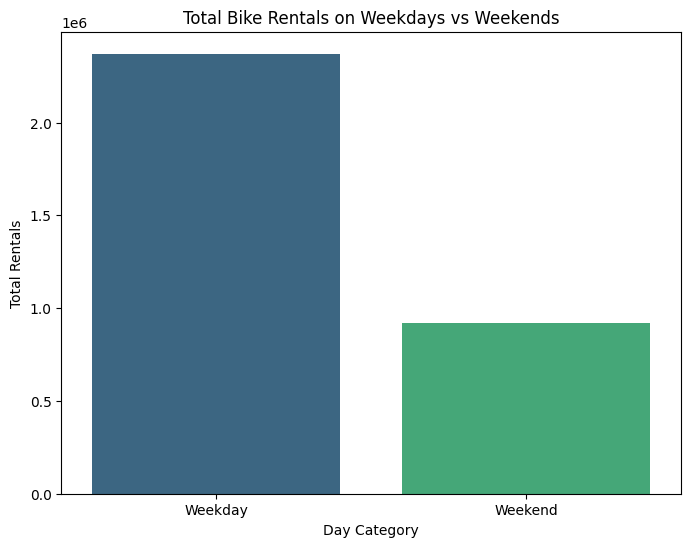

In [37]:
# group by day_category and calculate the sum of total_rent
day_category_rent = df_hour.groupby('day_category')['total_rent'].sum().reset_index()

# create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='day_category', y='total_rent', data=day_category_rent, palette='viridis')

# set title and labels
plt.title('Total Bike Rentals on Weekdays vs Weekends')
plt.xlabel('Day Category')
plt.ylabel('Total Rentals')

# show the plot
plt.show()

/var/folders/0x/6g78zn811lx20sbw8vydh3lw0000gn/T/ipykernel_22214/4288342313.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  weekly_trend = df_hour.pivot_table(index='weekday', columns='hour', values='total_rent', aggfunc='mean')


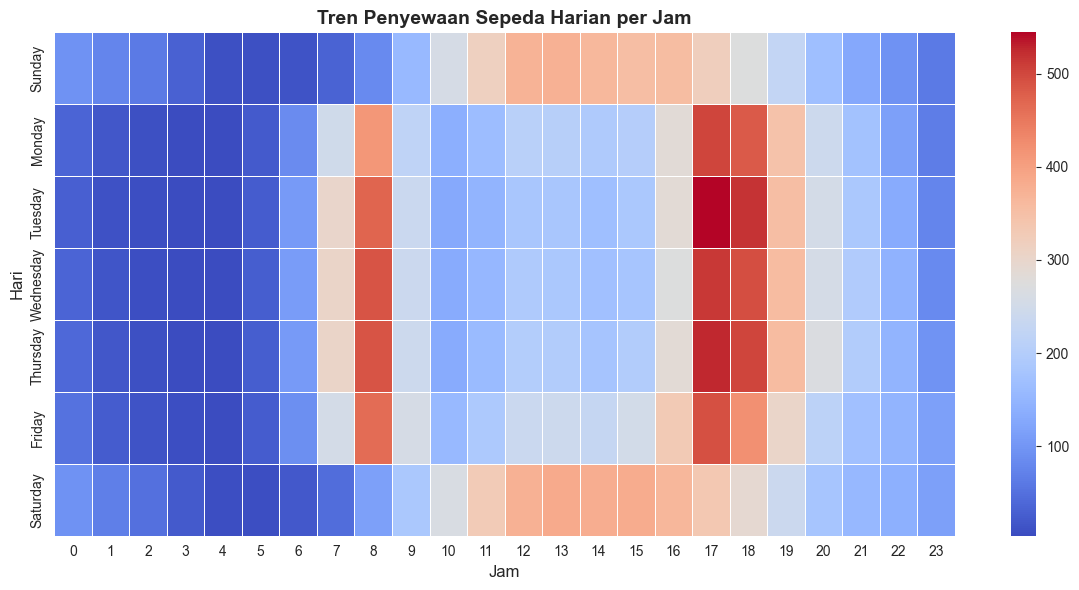

In [38]:
sns.set_style("whitegrid")
# Pivot the table to have weekdays as index, hours as columns, and total_rent as values
weekly_trend = df_hour.pivot_table(index='weekday', columns='hour', values='total_rent', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(weekly_trend, cmap="coolwarm", annot=False, cbar=True, linewidths=0.5)
plt.title('Tren Penyewaan Sepeda Harian per Jam', fontsize=14, fontweight='bold')
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Hari', fontsize=12)

plt.tight_layout()
plt.show()

### **Total Bike Rentals Correlationship**

There is a correlation between the day category (weekday vs. weekend) and total bike rentals.  Weekdays show significantly higher total rentals than weekends. And it's heavily influenced by the time of day and the day of the week:

- **Weekdays** : Show a strong correlation with peak rentals during commuting hours (around 8 AM and 5-6 PM), indicating work-related usage.
- **Weekends**: Have a more spread-out rental pattern, with higher rentals during midday and afternoon, suggesting recreational use.



### Question 3: How have bike rental sales performed over the past few years?

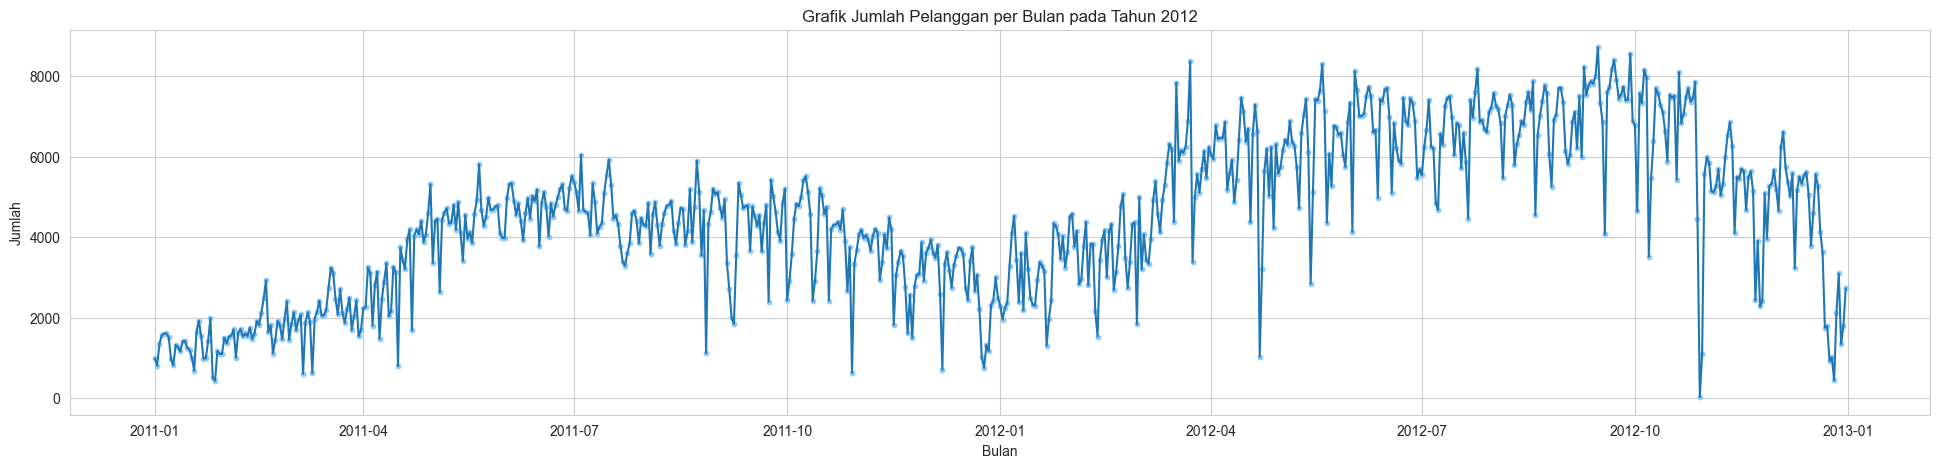

In [39]:
plt.figure(figsize=(24, 5))
# count sum of total_rent per day
monthly_counts = df_day['total_rent'].groupby(df_day['dteday']).max()

# createine plot
plt.scatter(monthly_counts.index, monthly_counts.values, c="#90CAF9", s=10, marker='o')
plt.plot(monthly_counts.index, monthly_counts.values)
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.title('Grafik Jumlah Pelanggan per Bulan pada Tahun 2012')
plt.show()

### **Market Performanced in 3 Years Period**

Based on the provided graph, here's how bike rental sales performed over the past few years:

- **2011** : Sales were relatively low and stable with minor fluctuations.
- **2012** : A significant surge in sales occurred, starting around April and peaking in the later half of the year. This indicates a period of high demand or a successful promotion.
- **2013** : Sales dropped back down to levels similar to 2011, suggesting the 2012 peak was an anomaly or a temporary trend

### Question 4: What is the number of rentals in each season?

/var/folders/0x/6g78zn811lx20sbw8vydh3lw0000gn/T/ipykernel_22214/1844336191.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_rent = df_day.groupby(by='season').total_rent.sum().sort_values(ascending=False).reset_index()
/var/folders/0x/6g78zn811lx20sbw8vydh3lw0000gn/T/ipykernel_22214/1844336191.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='total_rent', data=season_rent, palette='viridis')


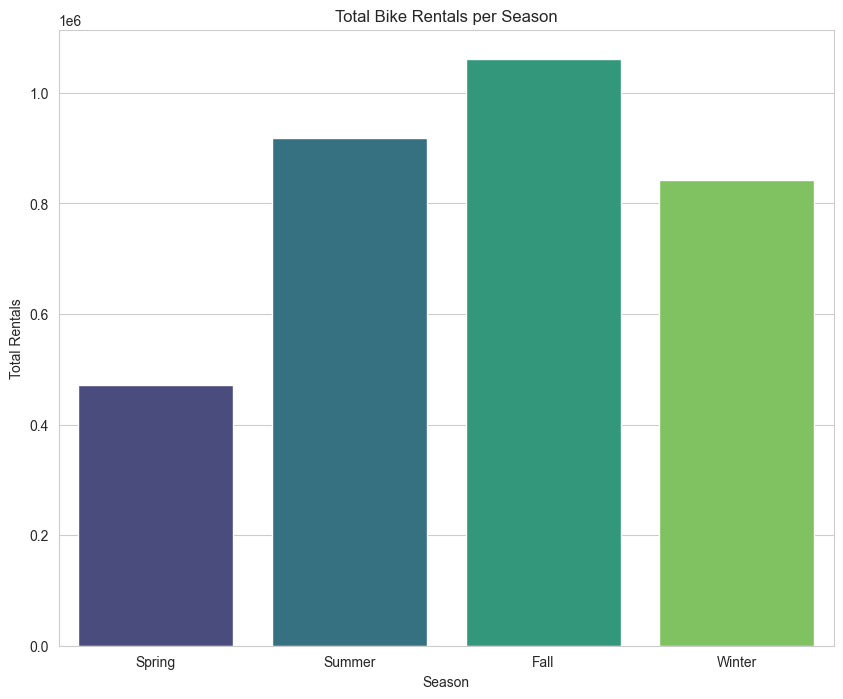

In [40]:
season_rent = df_day.groupby(by='season').total_rent.sum().sort_values(ascending=False).reset_index()

# create bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='season', y='total_rent', data=season_rent, palette='viridis')
plt.title('Total Bike Rentals per Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.show()

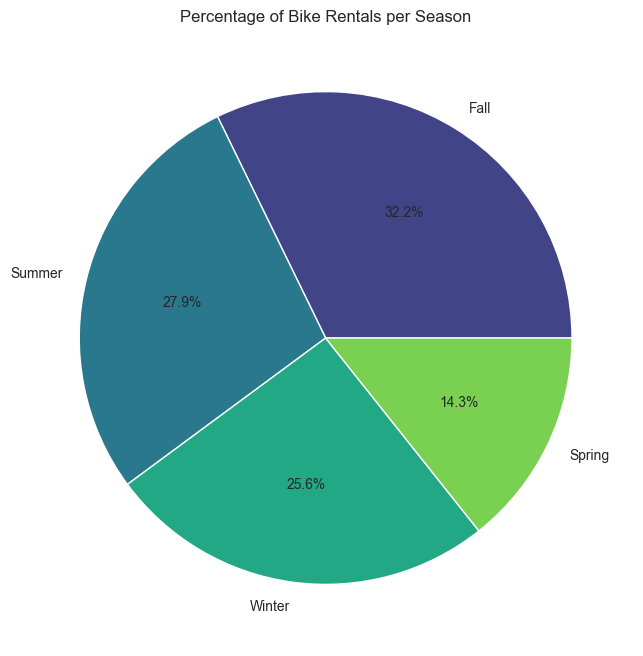

In [41]:
# create pie chart
plt.figure(figsize=(8, 8))
plt.pie(season_rent['total_rent'], labels=season_rent['season'], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(season_rent)))
plt.title('Percentage of Bike Rentals per Season')
plt.show()

### **In The Whole of Seasons in 3 Years Period**

Based on the bar chart:

- **Spring** : Approximately 0.47 million rentals.
- **Summer** : Approximately 0.9 million rentals.
- **Fall** : Approximately 1.05 million rentals.
- **Winter** : Approximately 0.84 million rentals.


## Conclusion

**Questions:**
- **Question 1:** When is the busiest time for bike rentals?
- **Question 2:** Is there a correlation in total bike rentals?
- **Question 3:** How have bike rental sales performed over the past few years?
- **Question 4:** What is the number of rentals in each season?

**Conclusion for Question 1:**  
Based on the image above, bike rentals are highest at 5:00 PM. In contrast, rentals at 4:00 AM are the lowest.

**Conclusion for Question 2:**  
Yes, there is a correlation. Bike rentals on weekends tend to be lower compared to weekdays.

**Conclusion for Question 3:**  
The year 2012 was a very successful period for bike rentals, with a dramatic increase in customers. However, this trend did not continue, and the number of customers fluctuated in the following years.

**Conclusion for Question 4:**  
Throughout the year, customers subscribe to bike rentals for their needs. In winter, the percentage is 25.6%, in summer 27.9%, in autumn 32.2%, and in spring 14.3%.


## Applying advance analysis using RFM & clustering analysist

### RFM Analysist

In [42]:
# RFM Analysis
current_of_date = max(df_hour['dteday'])
rfm_df = df_hour.groupby('registered').agg({
    'dteday': lambda x: (current_of_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'total_rent': 'sum'  # Monetary
}).reset_index()

rfm_df.columns = ['Registered', 'Recency', 'Frequency', 'Monetary']

print(rfm_df.head())

   Registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


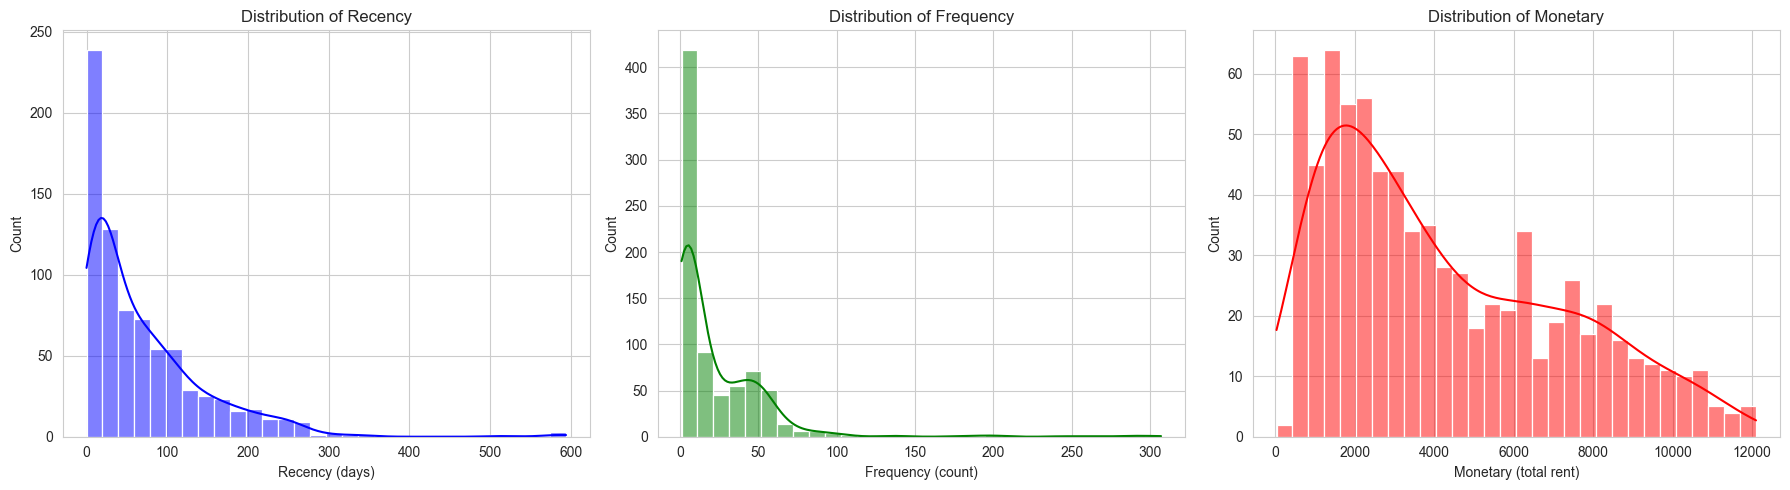

In [43]:
# see the distribution of Recency, Frequency, and Monetary
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm_df['Recency'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Recency')
axes[0].set_xlabel('Recency (days)')

sns.histplot(rfm_df['Frequency'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of Frequency')
axes[1].set_xlabel('Frequency (count)')

sns.histplot(rfm_df['Monetary'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Distribution of Monetary')
axes[2].set_xlabel('Monetary (total rent)')

plt.tight_layout()
plt.show()


### **How About RFM for This Rent Bike Data?**

- **Recency** : Most customers are recent, with a sharp drop-off in activity as recency increases (skewed left).
- **Frequency** : Most customers have low purchase frequency, with a similar left-skewed distribution.
- **Monetary** : Spending is more varied, but still skewed towards lower amounts, though with some high-value customers.

In essence, the customer base is dominated by recent, infrequent buyers with lower overall spending, but there are a few exceptions with higher values.

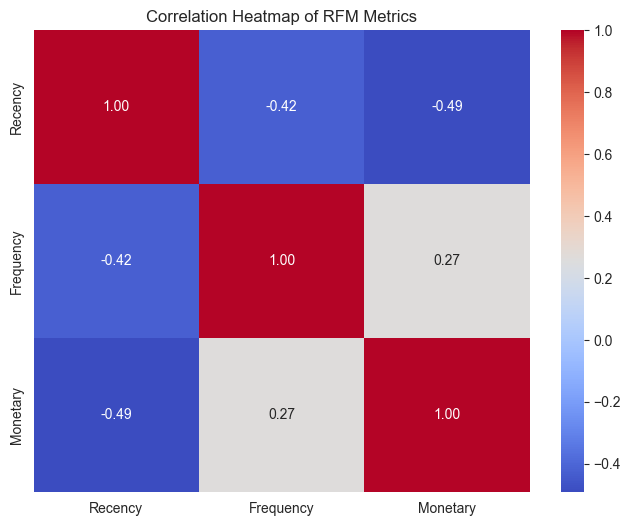

In [56]:
# find the correlation between Recency, Frequency, and Monetary
plt.figure(figsize=(8, 6))
sns.heatmap(rfm_df[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of RFM Metrics')
plt.show()

### **How About the Correlation?**

- Strong positive correlation within each RFM metric (1.00 along the diagonal).
- Negative correlation between Recency and Frequency (-0.42): More recent customers tend to have lower purchase frequency.
- Negative correlation between Recency and Monetary (-0.49): More recent customers tend to have lower monetary value.
- Weak positive correlation between Frequency and Monetary (0.27): Higher purchase frequency is slightly associated with higher monetary value.

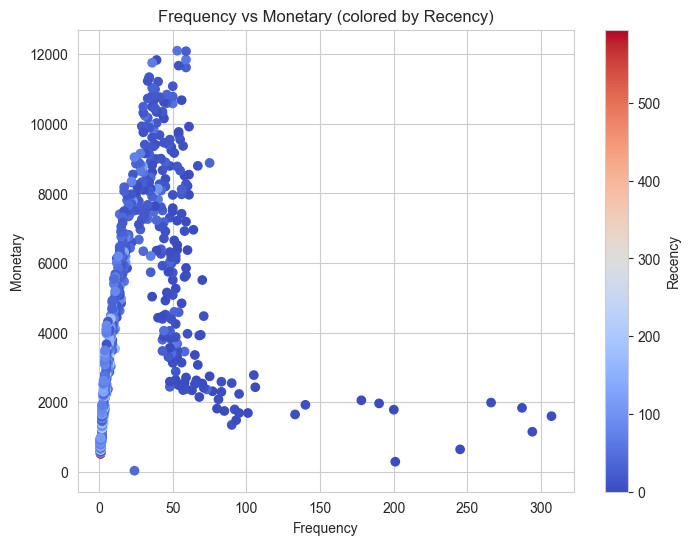

In [45]:
# find the relationship between Frequency and Monetary, colored by Recency
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x=rfm_df['Frequency'], y=rfm_df['Monetary'], c=rfm_df['Recency'], cmap='coolwarm')
plt.title('Frequency vs Monetary (colored by Recency)')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.colorbar(scatter, label='Recency')
plt.show()

### **What If the Frequency VS Monetary?**

This scatterplot of Frequency vs. Monetary, colored by Recency, shows:

- Clustering: A dense cluster of customers with low Frequency and low to moderate Monetary values.
- Positive Trend: A slight positive trend between Frequency and Monetary, meaning higher purchase frequency tends to correlate with higher spending, though it's not very strong.
- Recency Influence: Recent customers (blue points) are mostly concentrated in the low Frequency/Monetary cluster. Older customers (red points) are scattered across the chart, suggesting a more diverse spending pattern.
- Outliers: A few customers with very high Monetary values despite relatively low Frequency, indicating potential high-value, infrequent buyers.

### Clustering Analysist

/var/folders/0x/6g78zn811lx20sbw8vydh3lw0000gn/T/ipykernel_22214/2092458361.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_rent = df_hour.groupby(by="weather").total_rent.nunique().sort_values(ascending=False).reset_index()


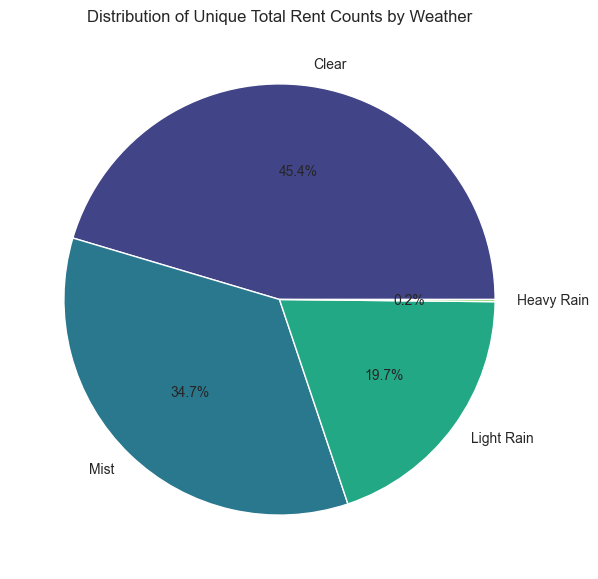

In [46]:
weather_rent = df_hour.groupby(by="weather").total_rent.nunique().sort_values(ascending=False).reset_index()

# Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(weather_rent['total_rent'], labels=weather_rent['weather'], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(weather_rent)))
plt.title('Distribution of Unique Total Rent Counts by Weather')
plt.show()


### **What If Total Rent Clustered by Weather?**

The pie chart shows the distribution of unique total rent counts by weather conditions.  Here's a breakdown:

- Clear Weather: Accounts for the largest share of rentals at 45.4%.
- Mist: Represents a significant portion of rentals at 34.7%.
- Light Rain: Contributes 19.7% of total rentals.
- Heavy Rain: Has a negligible impact, only 0.2% of total rentals.

**In short, most rentals occur in clear or misty weather, with light rain having a smaller impact and heavy rain having almost no impact.**

In [ ]:
# group by humidity_category and calculate the count of total_rent  
df_hour.groupby(by="humidity_category").agg({
    "total_rent": ["count"]})

,total_rent
,count
humidity_category,
High,9399
Low,774
Normal,7206


/var/folders/0x/6g78zn811lx20sbw8vydh3lw0000gn/T/ipykernel_22214/3332144653.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='humidity_category', y='total_rent', data=humidity_rent, palette='coolwarm')


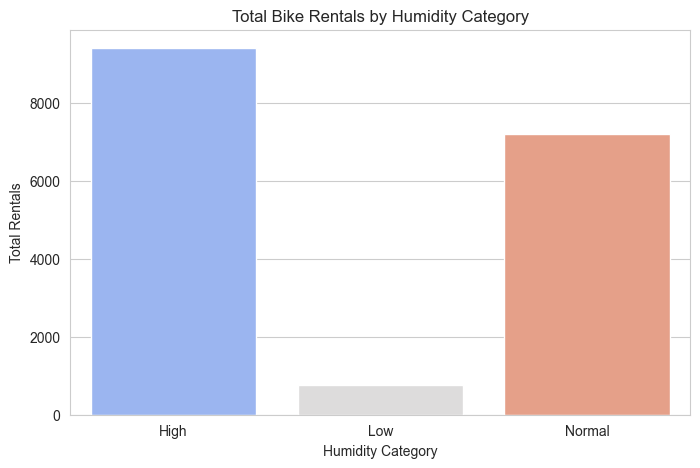

In [ ]:
# group by humidity_category and calculate the count of total_rent
humidity_rent = df_hour.groupby(by="humidity_category").agg({"total_rent": "count"}).reset_index()

# Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x='humidity_category', y='total_rent', data=humidity_rent, palette='coolwarm')
plt.title('Total Bike Rentals by Humidity Category')
plt.xlabel('Humidity Category')
plt.ylabel('Total Rentals')
plt.show()

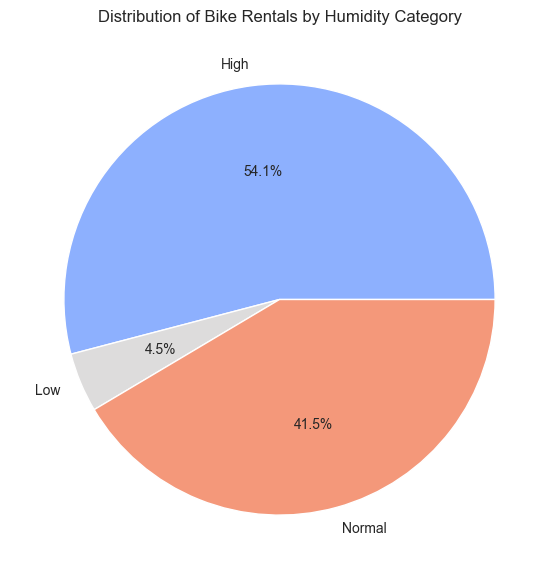

In [49]:
# Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(humidity_rent['total_rent'], labels=humidity_rent['humidity_category'], autopct='%1.1f%%', colors=sns.color_palette('coolwarm', len(humidity_rent)))
plt.title('Distribution of Bike Rentals by Humidity Category')
plt.show()


### **What If Total Rent by Clustered by Humidity?**

The bar graph shows the total bike rentals clustered by humidity categories:

- High Humidity: Has the highest number of rentals, exceeding 9000.
- Normal Humidity: Shows a significant number of rentals, around 7000.
- Low Humidity: Has a very low number of rentals, below 1000.

**In short, bike rentals are highest during periods of high humidity and normal humidity, while low humidity sees significantly fewer rentals.**

In [55]:
df_day.to_csv('Data/clean_day.csv', index=False)
df_hour.to_csv('Data/clean_hour.csv', index=False)